# 🧠 BRAIN TUMOR DETECTION MODEL USING YOLOv11 🦠


## 📦 Importing Required Libraries

In [1]:
import os
import glob
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image
from ultralytics import YOLO
import cv2
import numpy as np
import random

FlashAttention is not available on this device. Using scaled_dot_product_attention instead.


## ⚙️ Configuration and Hyperparameters

In [2]:
DATASET_PATH = 'dataset'
YAML_FILE = os.path.join(DATASET_PATH, 'data.yaml')

MODEL_NAME = 'yolo11n.pt'
EPOCHS = 500
IMG_SIZE = 640
# BATCH_SIZE = 16
CONF_THRESHOLD = 0.25
IOU_THRESHOLD = 0.45

Project_Name = 'Brain Tumor Detection'
RUN_NAME = 'YOLOv12_'

TRAIN_PROJECT_NAME = Project_Name
TRAIN_RUN_NAME = 'train_'+RUN_NAME

PREDICT_PROJECT_NAME = Project_Name
PREDICT_RUN_NAME = 'prediction_'+RUN_NAME

num_images_to_predict = 10

## 🏋️ Training the YOLOv11 Model

🤖 Defining Model 📦

In [3]:
model = YOLO("yolov12n.pt", task='detect')

🧑‍🏫 Training 🏃‍♂️

In [4]:
results = model.train(
    data=YAML_FILE,
    epochs=EPOCHS,
    imgsz=IMG_SIZE,
    # batch=BATCH_SIZE,
    project=TRAIN_PROJECT_NAME,
    name=TRAIN_RUN_NAME,
    amp=True,
    patience=16,
    pretrained=True,
    optimizer='auto',
    optimize=True,
)

print("Training finished. Model saved to:", model.trainer.save_dir)

BEST_MODEL_PATH = os.path.join(model.trainer.save_dir, 'weights', 'best.pt')
print("Best model weights path:", BEST_MODEL_PATH)

New https://pypi.org/project/ultralytics/8.3.172 available 😃 Update with 'pip install -U ultralytics'
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
engine/trainer: task=detect, mode=train, model=yolov12n.pt, data=dataset/data.yaml, epochs=500, time=None, patience=16, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=Brain Tumor Detection, name=train_YOLOv12_, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, em

train: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/train/labels.cache... 2144 images, 0 backgrounds, 0 corrupt: 100%|██████████| 2144/2144 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 2143, len(boxes) = 2144. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, num_output_channels=3, method='weighted_average'), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))


/mnt/Common/Code/Model Training/Nowshin/Bengali License Plate Detection/.conda/lib/python3.11/site-packages/albumentations/__init__.py:28: UserWarning: A new version of Albumentations is available: '2.0.8' (you have '2.0.4'). Upgrade using: pip install -U albumentations. To disable automatic update checks, set the environment variable NO_ALBUMENTATIONS_UPDATE to 1.
  check_for_updates()
/mnt/Common/Code/Model Training/Nowshin/Bengali License Plate Detection/yolov12/ultralytics/data/augment.py:1853: UserWarning: Argument(s) 'quality_lower' are not valid for transform ImageCompression
  A.ImageCompression(quality_lower=75, p=0.0),
val: Scanning /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/valid/labels.cache... 612 images, 0 backgrounds, 0 corrupt: 100%|██████████| 612/612 [00:00<?, ?it/s]


Plotting labels to Brain Tumor Detection/train_YOLOv12_/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: SGD(lr=0.01, momentum=0.9) with parameter groups 121 weight(decay=0.0), 128 weight(decay=0.0005), 127 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to Brain Tumor Detection/train_YOLOv12_
Starting training for 500 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/500      3.36G      1.248      3.973      1.388         30        640: 100%|██████████| 134/134 [00:30<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.06it/s]

                   all        612        612      0.406      0.463      0.366      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/500      3.31G      1.218      2.705      1.317         33        640: 100%|██████████| 134/134 [00:29<00:00,  4.59it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.39it/s]


                   all        612        612      0.388      0.411      0.322      0.222

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/500      3.31G      1.273      2.215      1.345         26        640: 100%|██████████| 134/134 [00:28<00:00,  4.63it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.62it/s]


                   all        612        612      0.535      0.405      0.392      0.252

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/500      3.31G      1.337      2.006      1.386         25        640: 100%|██████████| 134/134 [00:28<00:00,  4.62it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:03<00:00,  6.25it/s]

                   all        612        612      0.532       0.38       0.39      0.259



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/500      3.31G      1.331      1.762       1.41         31        640: 100%|██████████| 134/134 [00:29<00:00,  4.54it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]


                   all        612        612      0.696     0.0305     0.0159    0.00665

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/500      3.31G      1.293      1.635      1.387         35        640: 100%|██████████| 134/134 [00:27<00:00,  4.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.90it/s]


                   all        612        612      0.545      0.565      0.547      0.361

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/500      3.31G      1.268      1.509      1.362         19        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.97it/s]

                   all        612        612      0.668      0.633      0.638      0.442



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/500      3.31G      1.229      1.418      1.348         31        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.89it/s]

                   all        612        612      0.716       0.62      0.657      0.428



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/500      3.31G      1.237      1.413      1.354         25        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.94it/s]

                   all        612        612       0.73       0.72      0.752      0.515



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/500      3.31G      1.229      1.295      1.342         24        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.95it/s]

                   all        612        612      0.722      0.741       0.78      0.544



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/500      3.31G      1.197      1.269       1.33         28        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.89it/s]

                   all        612        612      0.712      0.728      0.743      0.504



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/500      3.31G      1.206      1.262      1.328         27        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.93it/s]

                   all        612        612      0.753      0.671      0.725      0.511



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/500      3.31G       1.21      1.253      1.345         28        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.92it/s]

                   all        612        612       0.68      0.683      0.689      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/500      3.31G      1.156      1.179      1.304         32        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.90it/s]

                   all        612        612      0.703       0.64      0.687      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/500      3.31G      1.177      1.198      1.314         29        640: 100%|██████████| 134/134 [00:28<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.98it/s]

                   all        612        612       0.73        0.6      0.663      0.471



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/500      3.31G      1.157      1.161      1.313         22        640: 100%|██████████| 134/134 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.00it/s]

                   all        612        612       0.76      0.795      0.834      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/500      3.31G      1.142      1.145      1.294         24        640: 100%|██████████| 134/134 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.96it/s]

                   all        612        612      0.676      0.566      0.597      0.414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/500      3.31G       1.14      1.109      1.288         22        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.96it/s]

                   all        612        612      0.817      0.794      0.843      0.608



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/500      3.31G       1.14      1.107      1.295         27        640: 100%|██████████| 134/134 [00:27<00:00,  4.79it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.00it/s]

                   all        612        612      0.826      0.765      0.826      0.592



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/500      3.31G      1.138      1.073      1.297         29        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.97it/s]

                   all        612        612      0.582      0.561      0.563        0.4



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/500      3.31G      1.141      1.052      1.303         24        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.98it/s]

                   all        612        612      0.745        0.7      0.741      0.524



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/500      3.31G      1.113      1.069      1.288         28        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]

                   all        612        612      0.846      0.801      0.868      0.631



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/500      3.31G        1.1      1.035      1.274         35        640: 100%|██████████| 134/134 [00:28<00:00,  4.77it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.99it/s]

                   all        612        612      0.849      0.813      0.878      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/500      3.31G      1.113      1.045      1.289         21        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.93it/s]

                   all        612        612      0.767      0.689       0.74      0.514



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/500      3.31G      1.091      1.031      1.273         25        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.00it/s]

                   all        612        612      0.808      0.743      0.823      0.581



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/500      3.31G      1.109      1.021      1.287         29        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.87it/s]

                   all        612        612      0.842      0.753      0.839      0.604



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/500      3.31G      1.105      1.013      1.279         25        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.98it/s]

                   all        612        612      0.866      0.791      0.855      0.617



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/500      3.31G      1.086     0.9962      1.266         26        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.02it/s]

                   all        612        612      0.863      0.796      0.872       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/500      3.31G      1.088     0.9795      1.251         24        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.95it/s]

                   all        612        612      0.849      0.798      0.862      0.626



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/500      3.31G      1.087      0.981      1.261         25        640: 100%|██████████| 134/134 [00:28<00:00,  4.78it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.97it/s]

                   all        612        612      0.821      0.765       0.85      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/500      3.31G      1.029     0.9477      1.225         37        640: 100%|██████████| 134/134 [00:26<00:00,  5.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.827      0.789      0.846      0.619



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/500      3.31G      1.086     0.9433      1.269         39        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.746      0.765      0.803      0.567



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/500      3.31G      1.043      0.915      1.245         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.56it/s]

                   all        612        612      0.874      0.783      0.888      0.648



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/500      3.31G      1.062     0.9084       1.25         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612      0.842      0.814      0.878      0.632



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/500      3.31G      1.054      0.929      1.246         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612       0.85      0.795      0.856      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/500      3.31G      1.039      0.897      1.239         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612       0.86      0.831      0.884       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/500      3.31G      1.037     0.9279      1.224         33        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.793      0.801      0.832      0.595



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/500      3.31G      1.033     0.8927      1.219         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.856      0.821      0.882      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/500      3.31G      1.021     0.8727      1.226         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.816      0.718      0.786       0.58



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/500      3.31G      1.013     0.8602      1.215         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.55it/s]

                   all        612        612      0.879      0.788      0.871      0.646



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/500      3.31G      1.012     0.8399      1.206         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.849      0.818       0.86      0.621



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/500      3.31G      1.001     0.8513      1.207         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.846      0.794      0.858      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/500      3.31G       1.01     0.8625      1.213         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.832      0.835      0.885      0.647



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/500      3.31G      1.011     0.8338      1.219         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612      0.844      0.828      0.878      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/500      3.31G       1.01     0.8524      1.207         15        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.883      0.829       0.89      0.643



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/500      3.31G     0.9885     0.8382        1.2         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.768      0.746      0.804      0.584



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/500      3.31G     0.9974     0.8117      1.207         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.842      0.829      0.857      0.622



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/500      3.31G     0.9978     0.8114       1.21         18        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.54it/s]

                   all        612        612      0.851      0.878      0.895      0.659



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/500      3.31G     0.9857     0.7895      1.199         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.878      0.831      0.894       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/500      3.31G     0.9967     0.7881      1.192         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.56it/s]

                   all        612        612      0.854      0.801      0.877       0.63



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/500      3.31G     0.9879     0.7972      1.189         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612      0.806       0.86      0.873      0.638



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/500      3.31G     0.9875     0.8062      1.197         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.871      0.837      0.898      0.655



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/500      3.31G     0.9794     0.7901      1.194         35        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612       0.86      0.799      0.861      0.645



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/500      3.31G      0.963     0.7756      1.181         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.835      0.854      0.885       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/500      3.31G     0.9675     0.7741      1.182         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.878      0.846      0.892      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/500      3.31G     0.9676      0.766      1.192         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.886      0.828      0.898      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/500      3.31G     0.9573     0.7671      1.172         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.866      0.851      0.904      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/500      3.31G     0.9381     0.7506      1.158         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.877      0.808      0.872      0.628



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/500      3.31G      0.958     0.7465      1.176         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.853      0.869      0.907      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/500      3.31G     0.9519     0.7563      1.173         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.55it/s]

                   all        612        612      0.868      0.824       0.89      0.662



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/500      3.31G     0.9536     0.7563       1.17         20        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.872      0.835      0.888      0.649



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/500      3.31G     0.9691     0.7861      1.186         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.881      0.785      0.857       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/500      3.31G     0.9657      0.766       1.18         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.886       0.85      0.907      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/500      3.31G     0.9565     0.7636      1.183         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612       0.75      0.674      0.721       0.52



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/500      3.31G       0.94     0.7418      1.165         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.835      0.784      0.832      0.613



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/500      3.31G     0.9376     0.7208      1.166         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.876      0.857      0.897      0.672



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/500      3.31G     0.9399     0.7246      1.169         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.874      0.861       0.89      0.658



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/500      3.31G     0.9469     0.7154      1.181         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.883      0.857      0.903      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/500      3.31G     0.9532     0.7447      1.166         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.835      0.857      0.896      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/500      3.31G     0.9498     0.7064      1.172         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.871      0.866      0.905      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/500      3.31G     0.9276     0.7126      1.154         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612       0.89      0.853       0.91      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/500      3.31G      0.924     0.6911      1.147         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.902      0.827      0.893      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/500      3.31G     0.9491     0.7088      1.163         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.883      0.849      0.898      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/500      3.31G     0.9083      0.689      1.153         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612      0.845       0.83      0.863       0.64



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/500      3.31G     0.9295     0.7005      1.162         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.856      0.882       0.91      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/500      3.31G     0.9125      0.673      1.134         18        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.917      0.836      0.914      0.677



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/500      3.31G     0.9033     0.6739      1.135         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.828       0.87      0.895      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/500      3.31G     0.9013     0.6725      1.141         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.56it/s]

                   all        612        612       0.92      0.852      0.918      0.681



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/500      3.31G     0.9072      0.676       1.14         33        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.875       0.85      0.887       0.66



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/500      3.31G     0.9201      0.696      1.155         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.872      0.845      0.895      0.669



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/500      3.31G     0.8999     0.6732      1.137         25        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.838       0.75      0.798      0.569



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/500      3.31G     0.8993     0.6888      1.131         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.861      0.858      0.893      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/500      3.31G     0.9165     0.6824      1.152         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612       0.89      0.865      0.917      0.686



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/500      3.31G     0.9101     0.6835      1.138         18        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.905      0.832      0.894      0.654



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/500      3.31G     0.8979     0.6569      1.127         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.867      0.875      0.906      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/500      3.31G     0.8807     0.6609      1.125         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612       0.89       0.85      0.906      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/500      3.31G     0.8851     0.6629      1.138         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.889      0.851      0.901      0.674



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/500      3.31G     0.8892     0.6572      1.129         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612       0.88      0.804       0.87      0.644



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/500      3.31G     0.8872     0.6448      1.121         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.862      0.844      0.893      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/500      3.31G     0.8891     0.6526       1.13         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.897      0.857      0.914      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/500      3.31G      0.894     0.6551      1.136         37        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.886      0.856      0.915      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/500      3.31G     0.8638     0.6434      1.108         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.892      0.886      0.919      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/500      3.31G     0.8747     0.6338      1.126         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.889      0.867      0.906      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/500      3.31G     0.8658     0.6227      1.111         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.876       0.88      0.912       0.67



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/500      3.31G     0.8618     0.6065      1.122         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.924      0.849       0.92      0.693



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/500      3.31G     0.8343     0.6148      1.094         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.914      0.852      0.914      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/500      3.31G     0.8609     0.6157      1.114         32        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612       0.89      0.834      0.901      0.666



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/500      3.31G     0.8557     0.6316      1.121         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612       0.87      0.832      0.885      0.661



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/500      3.31G     0.8497     0.6134      1.107         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.912      0.864      0.911      0.678



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/500      3.31G     0.8771     0.6391      1.117         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.59it/s]

                   all        612        612      0.905      0.866      0.915      0.688



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    101/500      3.31G     0.8422     0.5921      1.108         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612      0.913      0.861      0.918      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    102/500      3.31G     0.8532     0.6235      1.109         30        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.907      0.857      0.921      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    103/500      3.31G     0.8491     0.6081      1.103         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.893      0.844      0.887      0.673



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    104/500      3.31G     0.8439     0.6255      1.113         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.913       0.85      0.917      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    105/500      3.31G     0.8373      0.606      1.096         16        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.905      0.865       0.92      0.698



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    106/500      3.31G     0.8417     0.5794      1.097         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.891      0.885      0.921      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    107/500      3.31G     0.8461     0.5862      1.105         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612        0.9      0.857      0.915      0.694



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    108/500      3.31G     0.8629      0.619      1.111         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.872      0.881      0.914       0.69



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    109/500      3.31G     0.8345     0.5883      1.102         31        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.902      0.866      0.916      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    110/500      3.31G     0.8364     0.5889      1.088         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.903      0.883      0.923        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    111/500      3.31G     0.8644     0.6119      1.121         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612       0.91      0.876      0.923      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    112/500      3.31G     0.8446     0.5783      1.101         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612       0.91      0.873      0.924      0.704



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    113/500      3.31G     0.8366     0.6012      1.094         22        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.65it/s]

                   all        612        612      0.917       0.85      0.908      0.687



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    114/500      3.31G     0.8287     0.5905      1.091         18        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.898      0.856      0.901      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    115/500      3.31G     0.8369     0.6117       1.09         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.57it/s]

                   all        612        612      0.884      0.863        0.9      0.675



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    116/500      3.31G     0.8279     0.5886      1.092         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612        0.9      0.879      0.919      0.692



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    117/500      3.31G     0.8284     0.5857      1.092         33        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.60it/s]

                   all        612        612       0.86      0.825      0.855      0.641



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    118/500      3.31G     0.8403     0.5897      1.099         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.66it/s]

                   all        612        612      0.896       0.83      0.897      0.668



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    119/500      3.31G     0.8256     0.5722      1.087         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.885      0.873      0.912      0.696



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    120/500      3.31G      0.809     0.5699      1.077         28        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.906      0.857      0.913      0.684



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    121/500      3.31G     0.8268     0.5875      1.096         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.18it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.897      0.875      0.913      0.682



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    122/500      3.31G     0.8402     0.5852      1.096         19        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.58it/s]

                   all        612        612      0.895      0.888      0.924      0.701



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    123/500      3.31G     0.8185     0.5749      1.085         29        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.62it/s]

                   all        612        612      0.932      0.862       0.92      0.702



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    124/500      3.31G     0.8097     0.5589      1.081         23        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.893      0.886      0.922      0.699



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    125/500      3.31G     0.8094     0.5658      1.074         27        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.64it/s]

                   all        612        612      0.901      0.844      0.899      0.683



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    126/500      3.31G     0.8072     0.5649      1.069         26        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.903      0.877      0.911      0.691



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    127/500      3.31G      0.822     0.5706      1.095         24        640: 100%|██████████| 134/134 [00:25<00:00,  5.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.63it/s]

                   all        612        612      0.909      0.873      0.927        0.7



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    128/500      3.31G     0.7996     0.5596      1.065         21        640: 100%|██████████| 134/134 [00:25<00:00,  5.20it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  7.61it/s]

                   all        612        612      0.902      0.883      0.922       0.69
EarlyStopping: Training stopped early as no improvement observed in last 16 epochs. Best results observed at epoch 112, best model saved as best.pt.
To update EarlyStopping(patience=16) pass a new patience value, i.e. `patience=300` or use `patience=0` to disable EarlyStopping.



128 epochs completed in 1.047 hours.
Optimizer stripped from Brain Tumor Detection/train_YOLOv12_/weights/last.pt, 5.5MB
Optimizer stripped from Brain Tumor Detection/train_YOLOv12_/weights/best.pt, 5.5MB

Validating Brain Tumor Detection/train_YOLOv12_/weights/best.pt...
Ultralytics 8.3.63 🚀 Python-3.11.13 torch-2.2.2+cu121 CUDA:0 (NVIDIA GeForce RTX 3060, 11913MiB)
YOLOv12n summary (fused): 376 layers, 2,508,929 parameters, 0 gradients, 5.8 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 20/20 [00:02<00:00,  6.85it/s]


                   all        612        612      0.906      0.876      0.925      0.704
                glioma        285        285      0.822      0.768      0.844      0.559
            meningioma        142        142      0.971       0.94      0.975      0.814
             pituitary        185        185      0.924      0.919      0.954      0.737
Speed: 0.1ms preprocess, 2.7ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to Brain Tumor Detection/train_YOLOv12_
Training finished. Model saved to: Brain Tumor Detection/train_YOLOv12_
Best model weights path: Brain Tumor Detection/train_YOLOv12_/weights/best.pt


## 🔍 Setting Up for Predictions and Visualization

In [5]:
import random

print("\nStarting prediction on test images and visualization...")

trained_model = YOLO(BEST_MODEL_PATH)

TEST_IMAGES_DIR = os.path.join(DATASET_PATH, 'test', 'images')
TEST_LABELS_DIR = os.path.join(DATASET_PATH, 'test', 'labels')

test_image_files = glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.jpeg')) + \
                   glob.glob(os.path.join(TEST_IMAGES_DIR, '*.png'))
random.shuffle(test_image_files)

num_images_to_predict = 10
if num_images_to_predict > 0:                   
    test_image_files = test_image_files[:num_images_to_predict]


Starting prediction on test images and visualization...


## 🏷️ Loading Class Names

In [6]:
def load_class_names(yaml_path):
    import yaml
    with open(yaml_path, 'r') as f:
        data = yaml.safe_load(f)
    return data['names']

class_names = load_class_names(YAML_FILE)

## 🖍️ Helper Function to Draw Annotations

In [7]:
def draw_annotations(image, annotations, class_names, color=(0, 255, 0), is_gt=False):
    img_height, img_width, _ = image.shape
    display_image = image.copy()

    for ann in annotations:
        class_id = int(ann[0])
        
        if len(ann) >= 5: # Check if there are at least 5 elements (class_id + 4 coords)
            x_center, y_center, width, height = ann[1:5]
        else:
            # Handle cases where annotation might be malformed or incomplete
            print(f"Warning: Annotation {ann} does not have enough values for bounding box. Skipping.")
            continue

        x_min = int((x_center - width / 2) * img_width)
        y_min = int((y_center - height / 2) * img_height)
        x_max = int((x_center + width / 2) * img_width)
        y_max = int((y_center + height / 2) * img_height)

        cv2.rectangle(display_image, (x_min, y_min), (x_max, y_max), color, 2)

        label = class_names[class_id]
        if not is_gt and len(ann) > 5:
            confidence = ann[5]
            label += f' {confidence:.2f}'

        cv2.putText(display_image, label, (x_min, y_min - 10), 
                    cv2.FONT_HERSHEY_SIMPLEX, 0.5, color, 2)
    return display_image

## 🖼️ Predict and Visualize Each Test Image


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2033_jpg.rf.a8066ff978dec1e789ccfd53e2f32b95.jpg: 640x640 1 glioma, 9.4ms
Speed: 1.0ms preprocess, 9.4ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


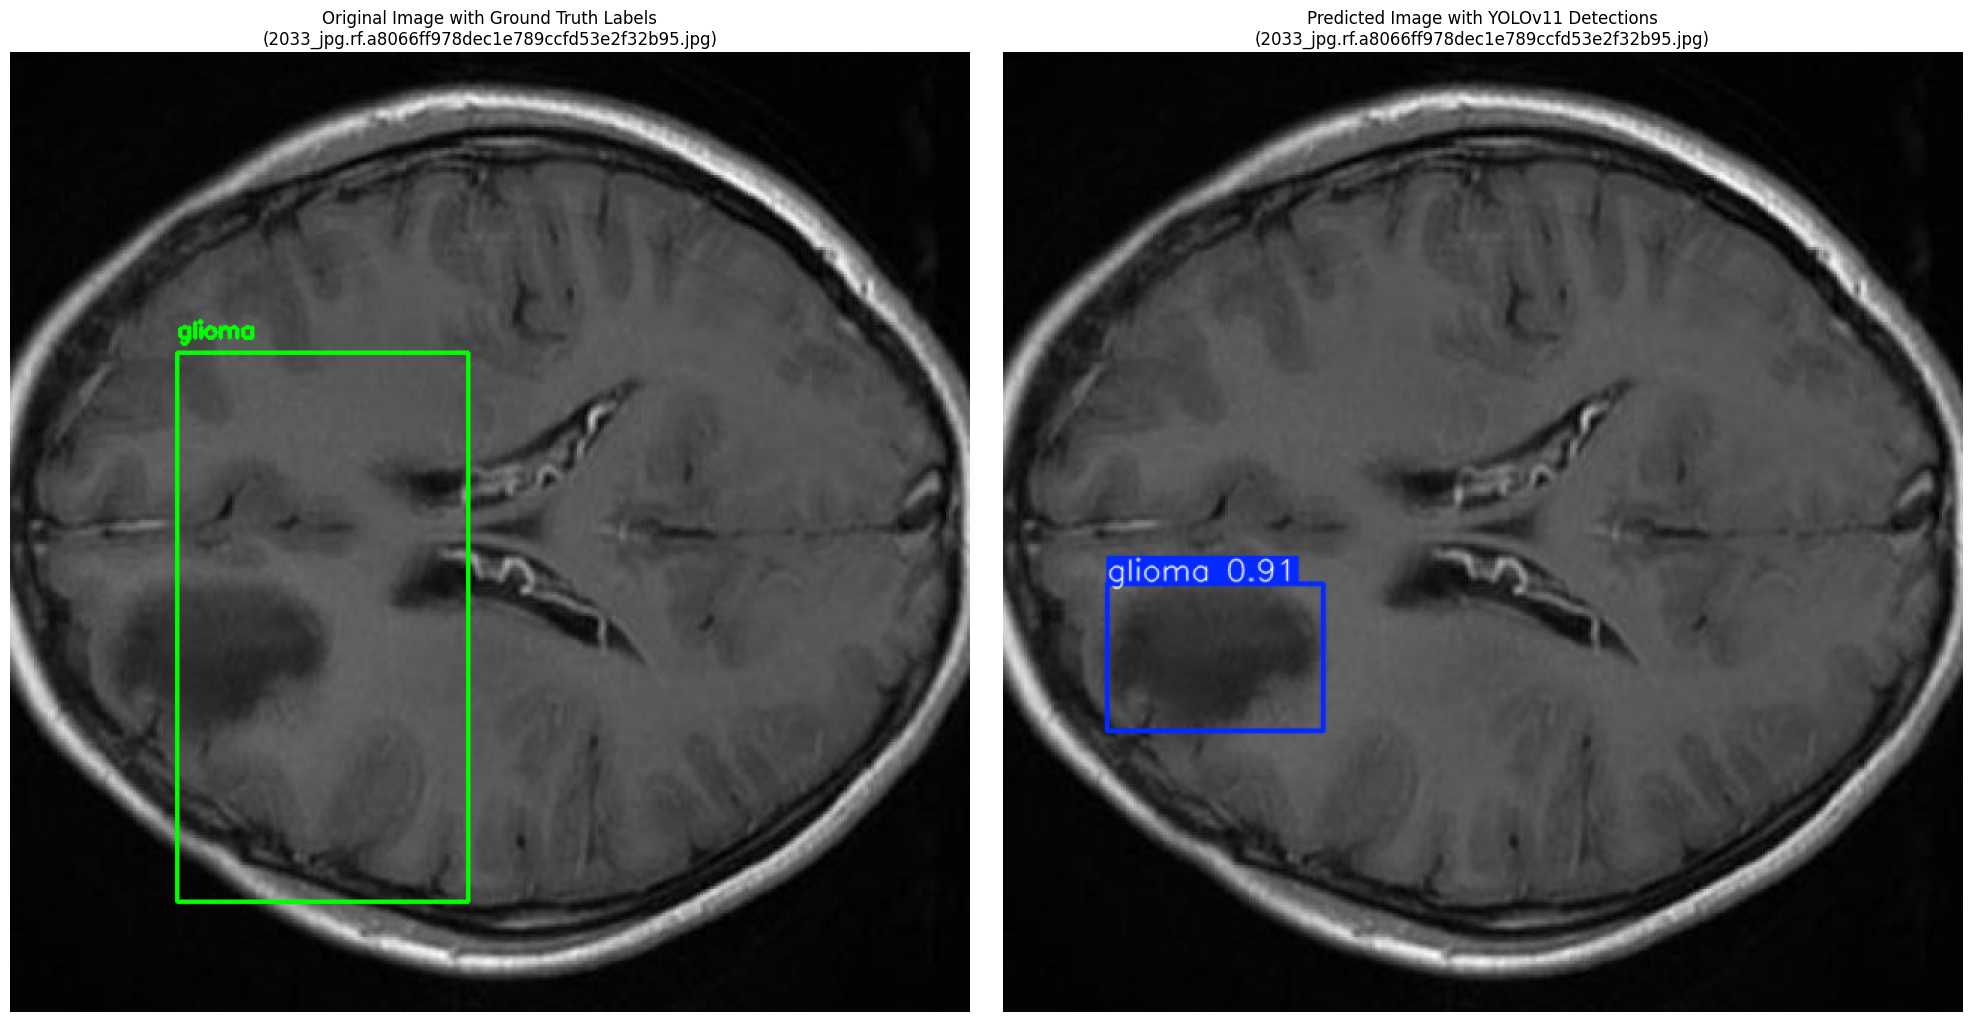


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2748_jpg.rf.187db47b1d14080c2c986ae5f35ceae9.jpg: 640x640 (no detections), 13.1ms
Speed: 1.0ms preprocess, 13.1ms inference, 0.5ms postprocess per image at shape (1, 3, 640, 640)


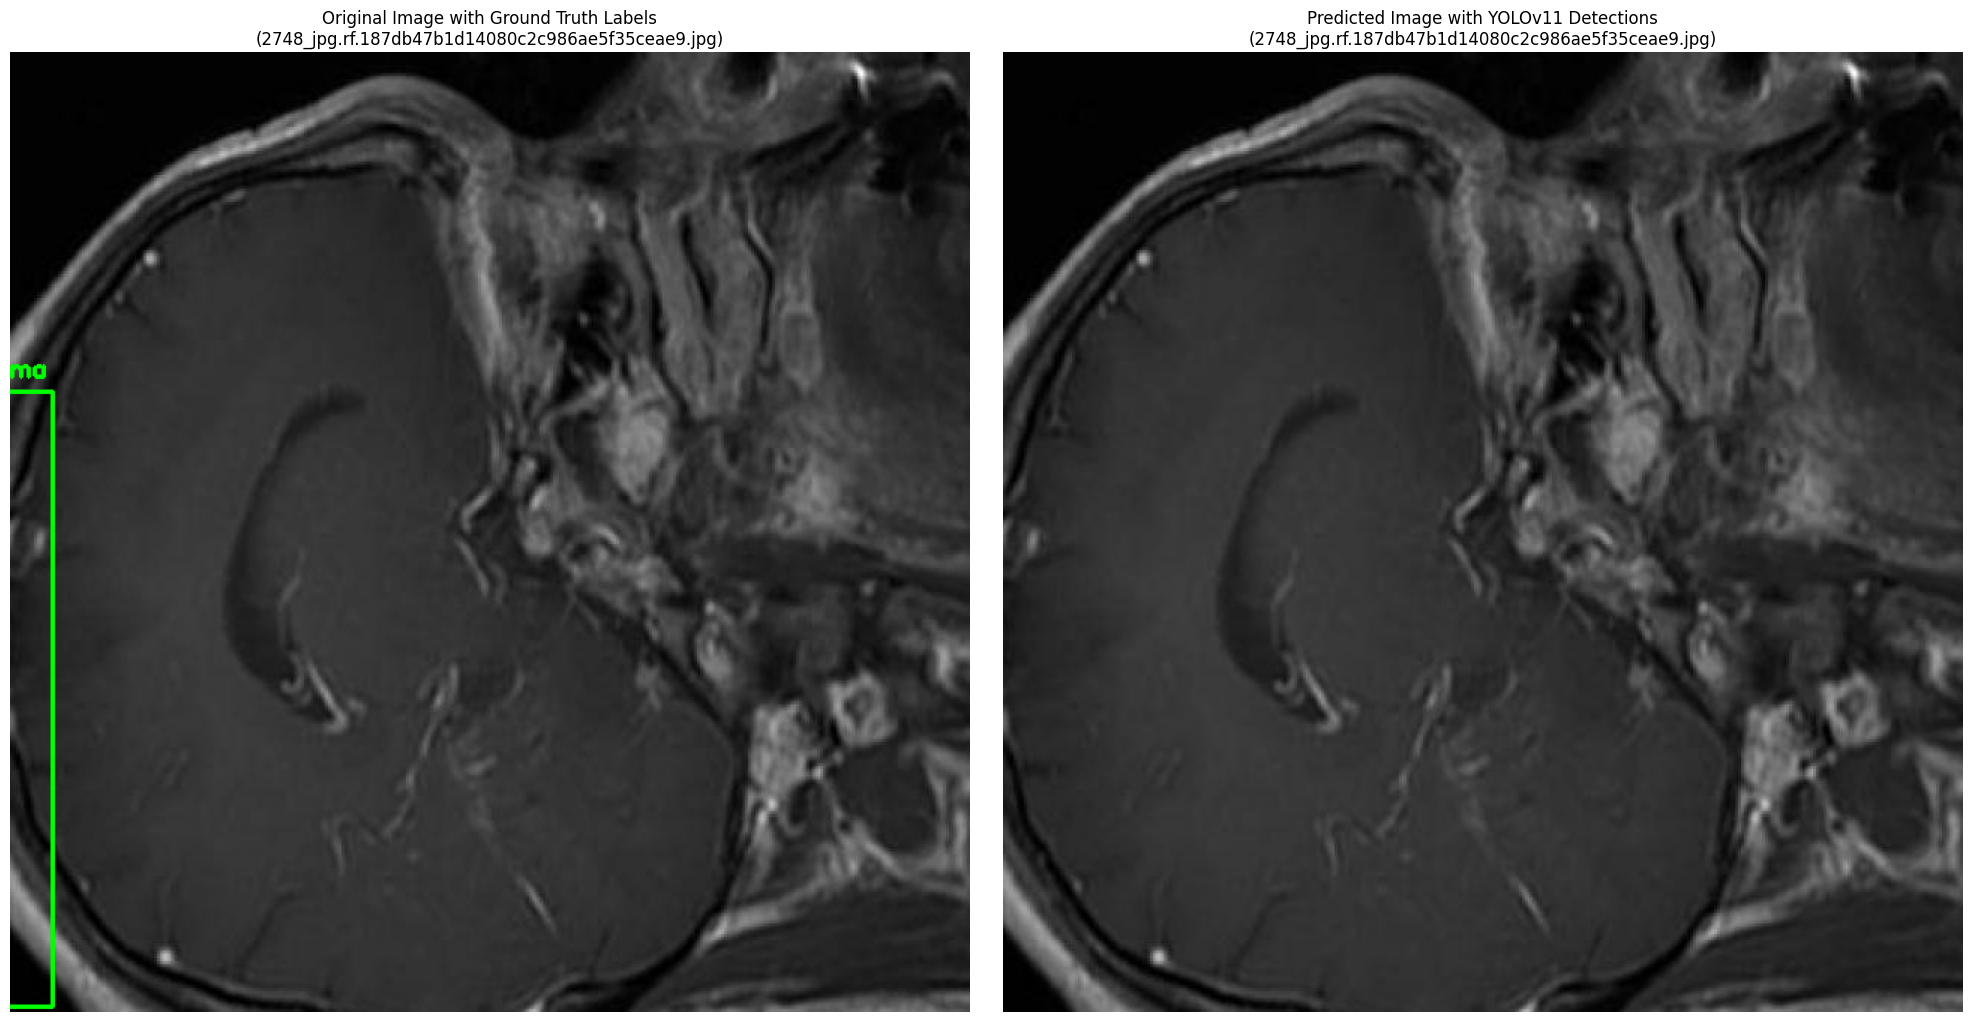


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/1695_jpg.rf.b78bac3897bf7ab99f9936821021d56f.jpg: 640x640 1 pituitary, 10.1ms
Speed: 1.1ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


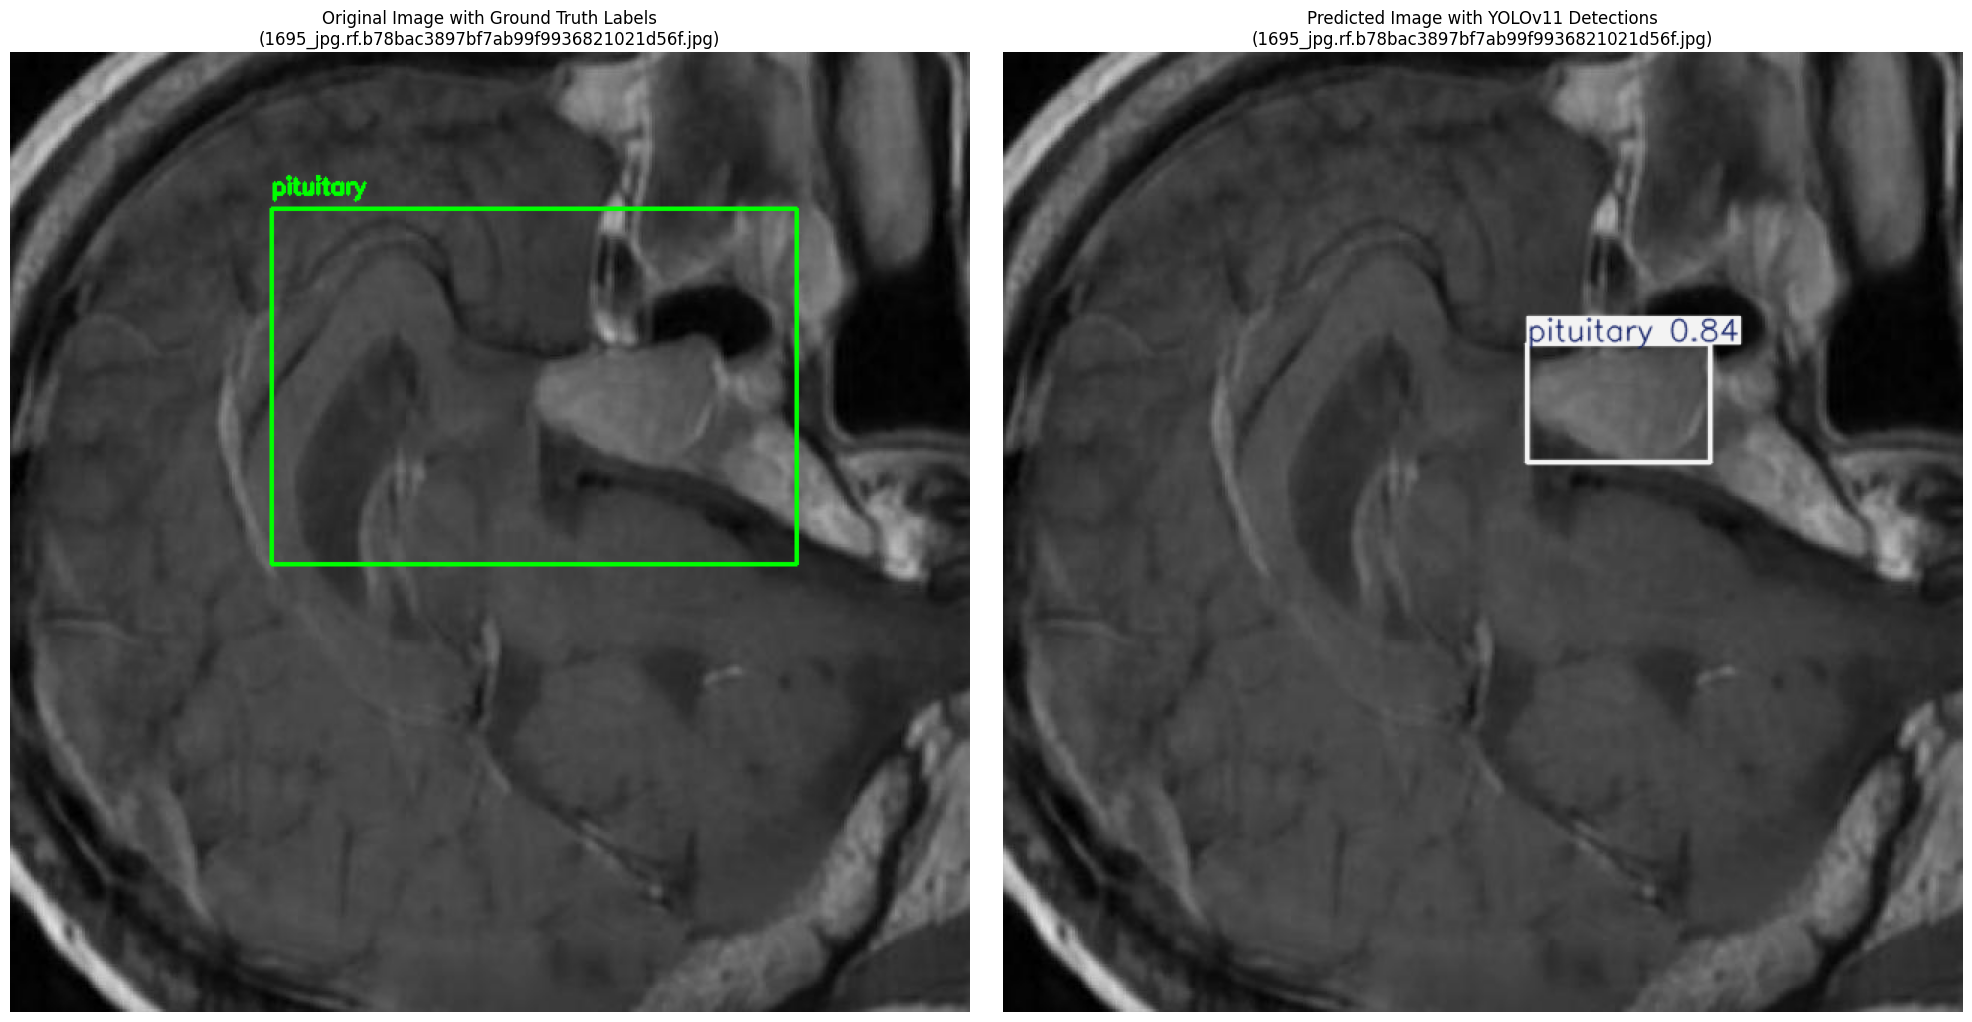


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2200_jpg.rf.7be896ca079a8b8801845a14b8f9b2b5.jpg: 640x640 1 glioma, 12.2ms
Speed: 1.0ms preprocess, 12.2ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


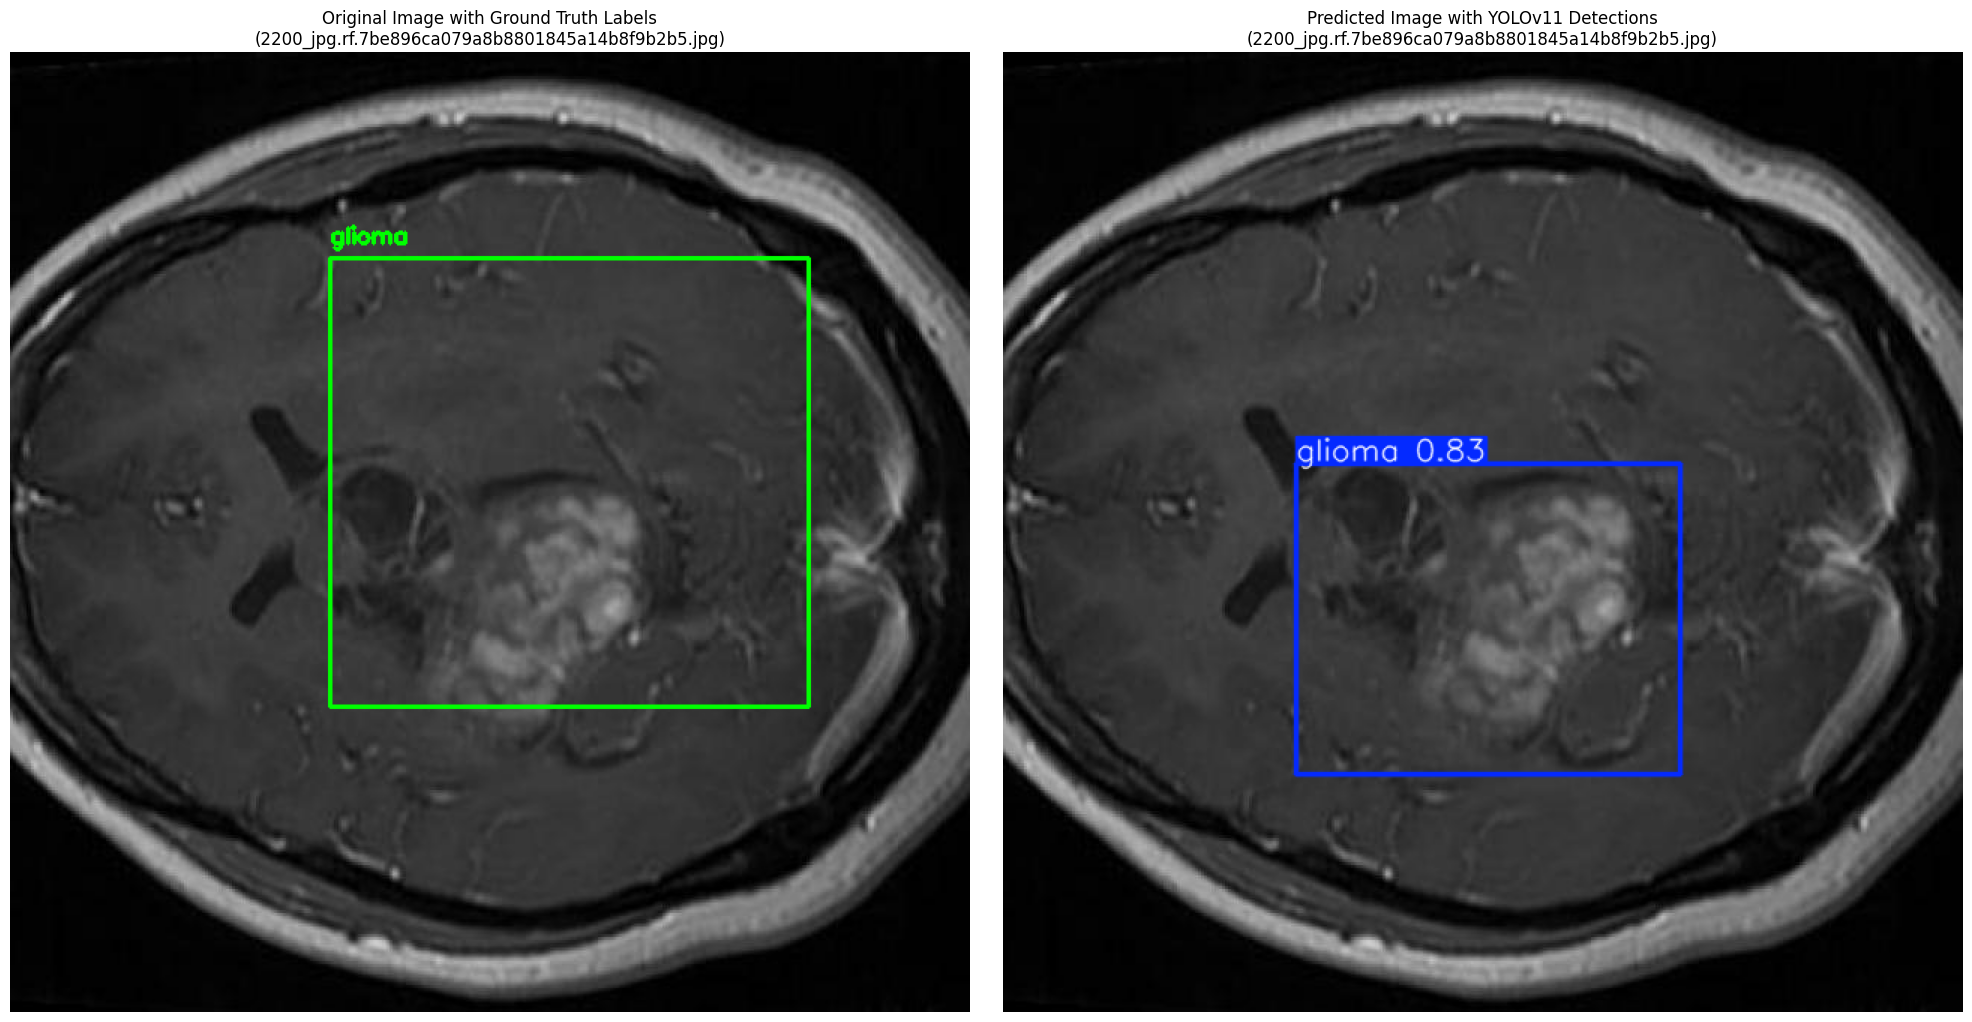


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2347_jpg.rf.3a9d113da7e0bcd3ea58a80a19254a1a.jpg: 640x640 1 glioma, 10.3ms
Speed: 1.0ms preprocess, 10.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


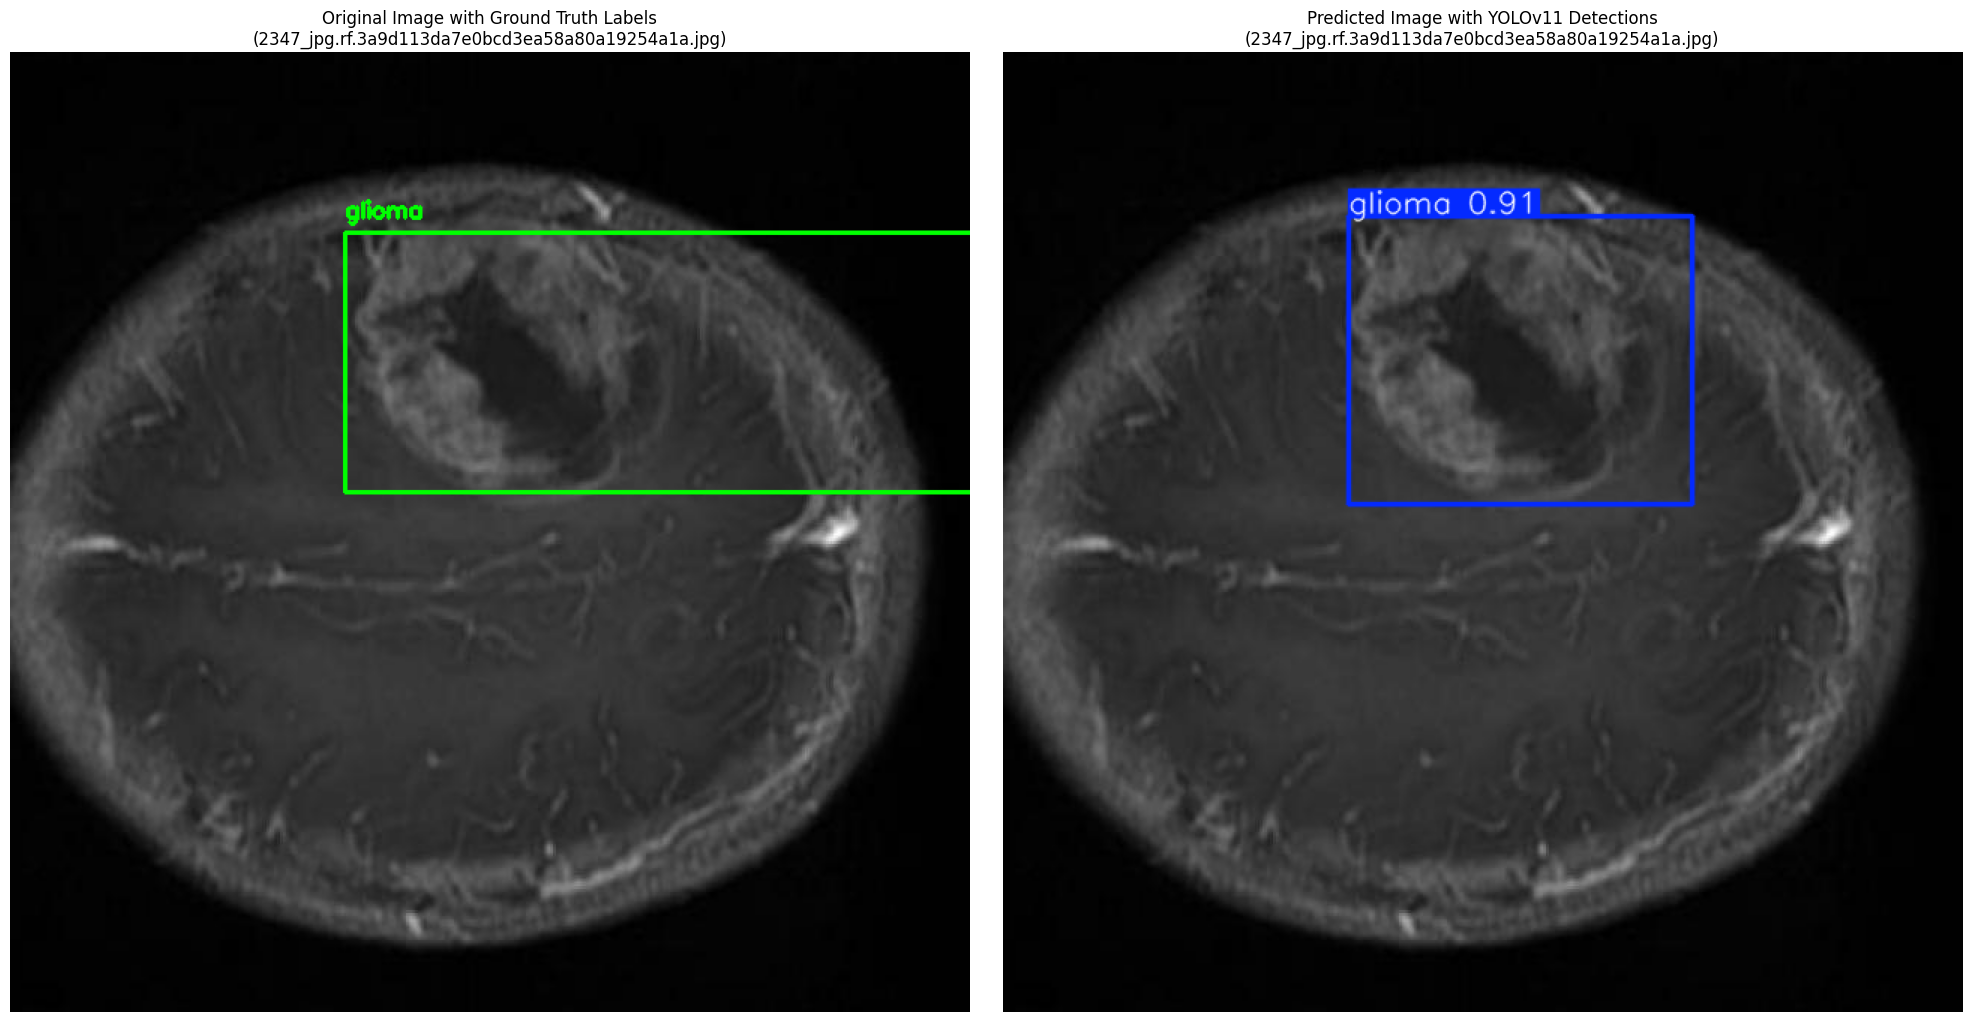


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/964_jpg.rf.7ce0bb422c279b80d38fbe1b4d46dabf.jpg: 640x640 1 pituitary, 10.1ms
Speed: 1.0ms preprocess, 10.1ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


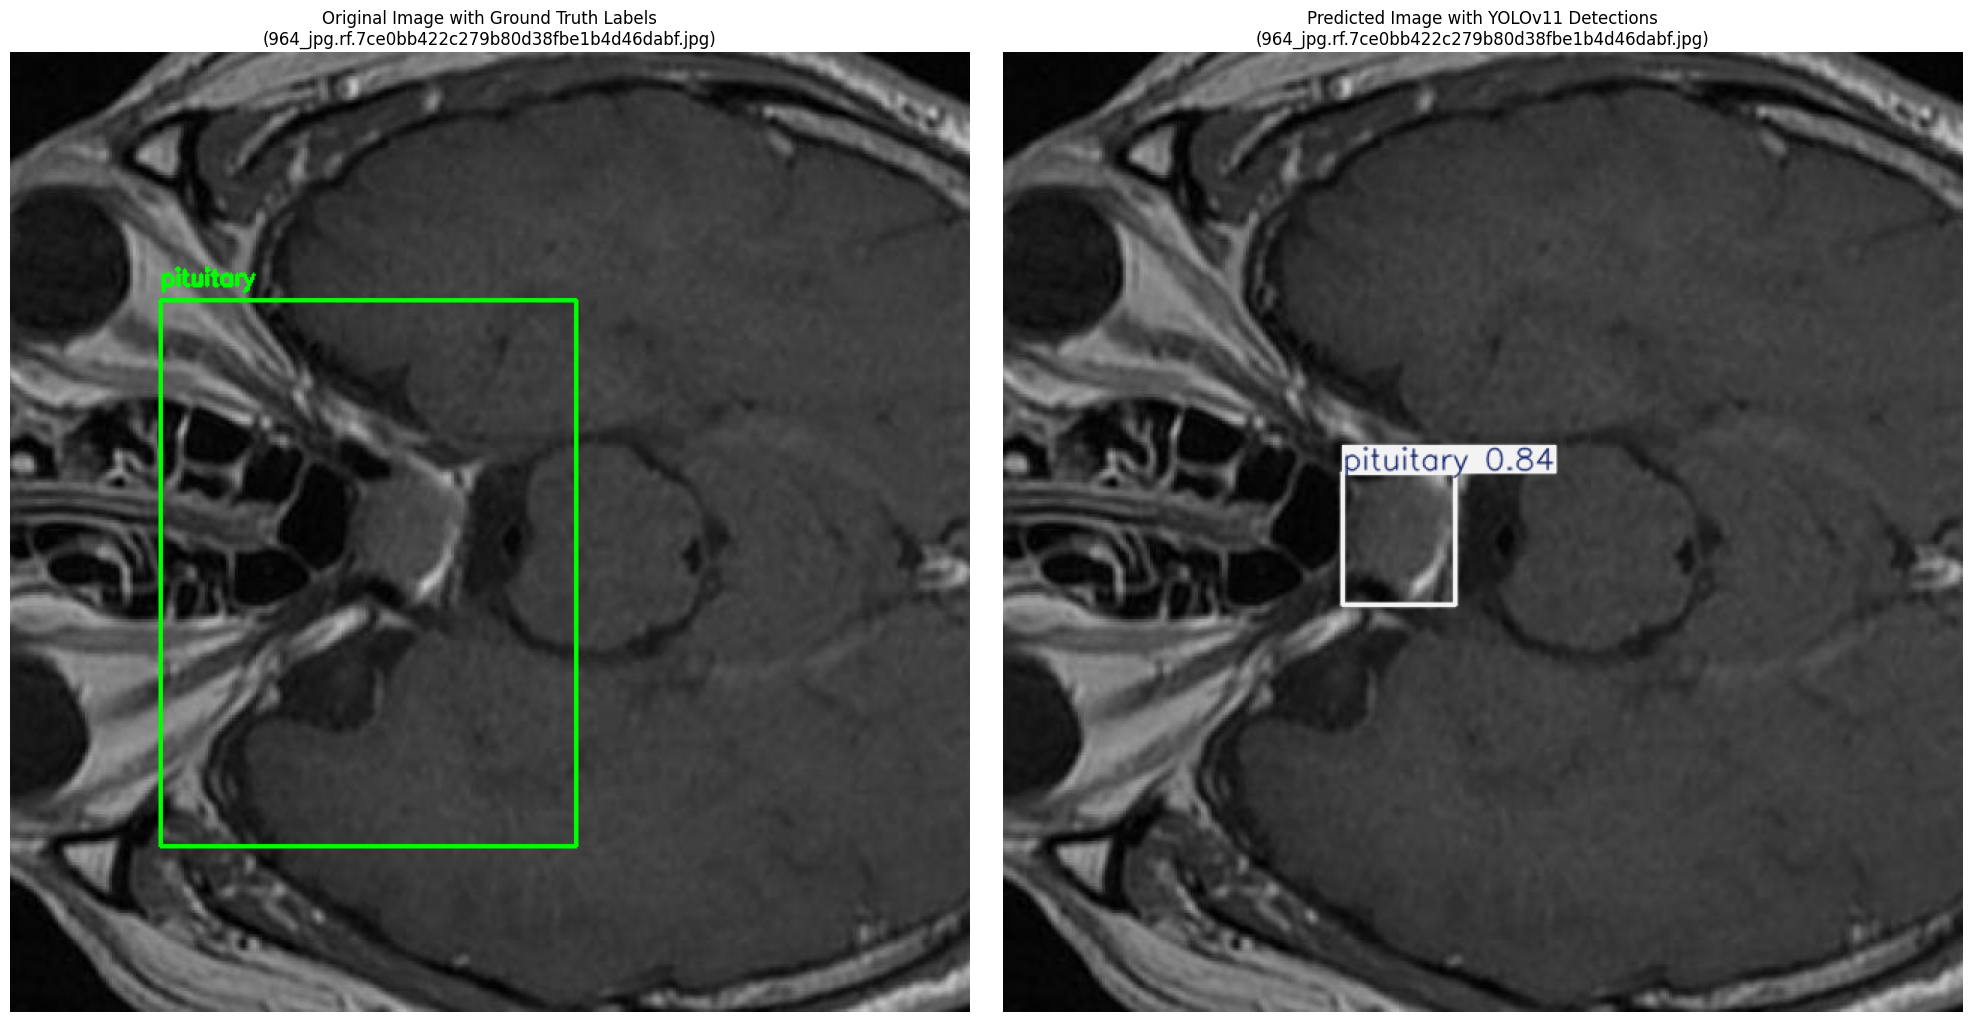


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2657_jpg.rf.3682b4bc734fbc4ace8d831043c87fe9.jpg: 640x640 1 glioma, 13.9ms
Speed: 1.1ms preprocess, 13.9ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


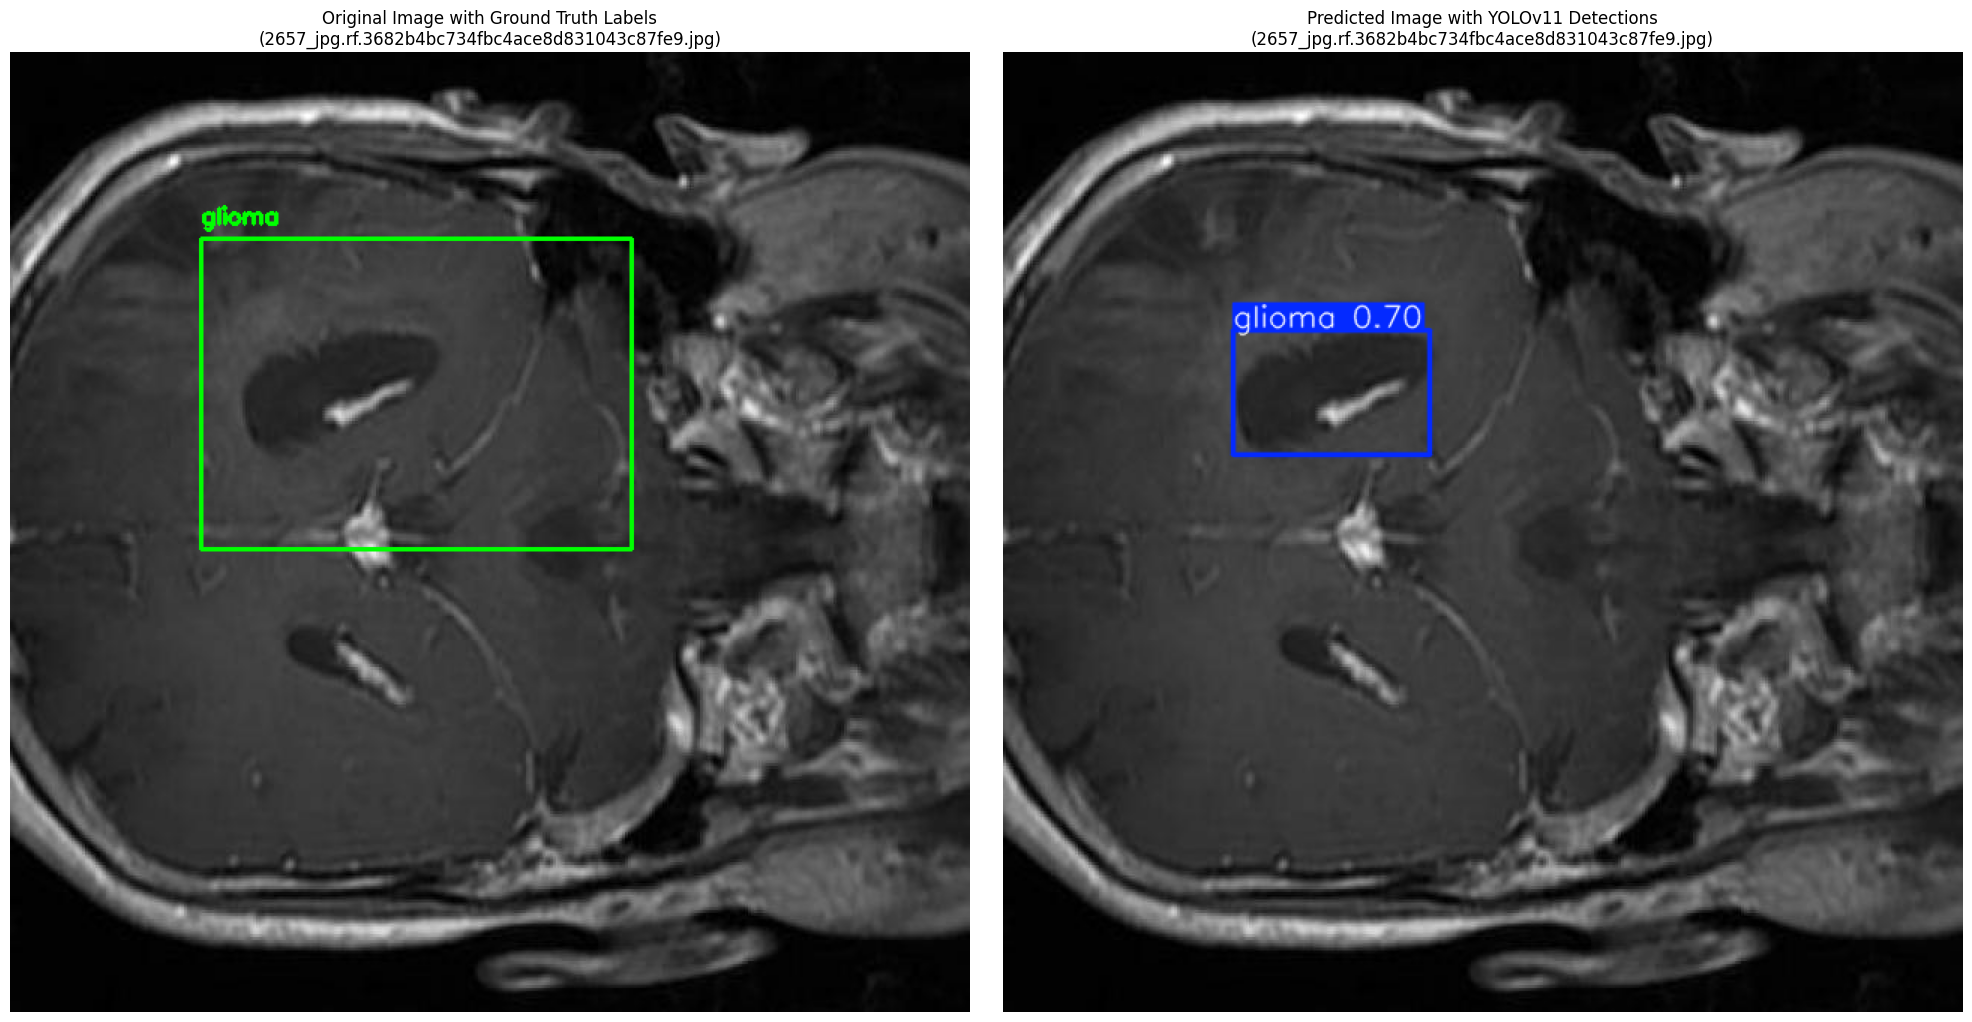


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/900_jpg.rf.70fdbdeca5b71e51595bd918985f600e.jpg: 640x640 2 gliomas, 12.7ms
Speed: 1.3ms preprocess, 12.7ms inference, 1.1ms postprocess per image at shape (1, 3, 640, 640)


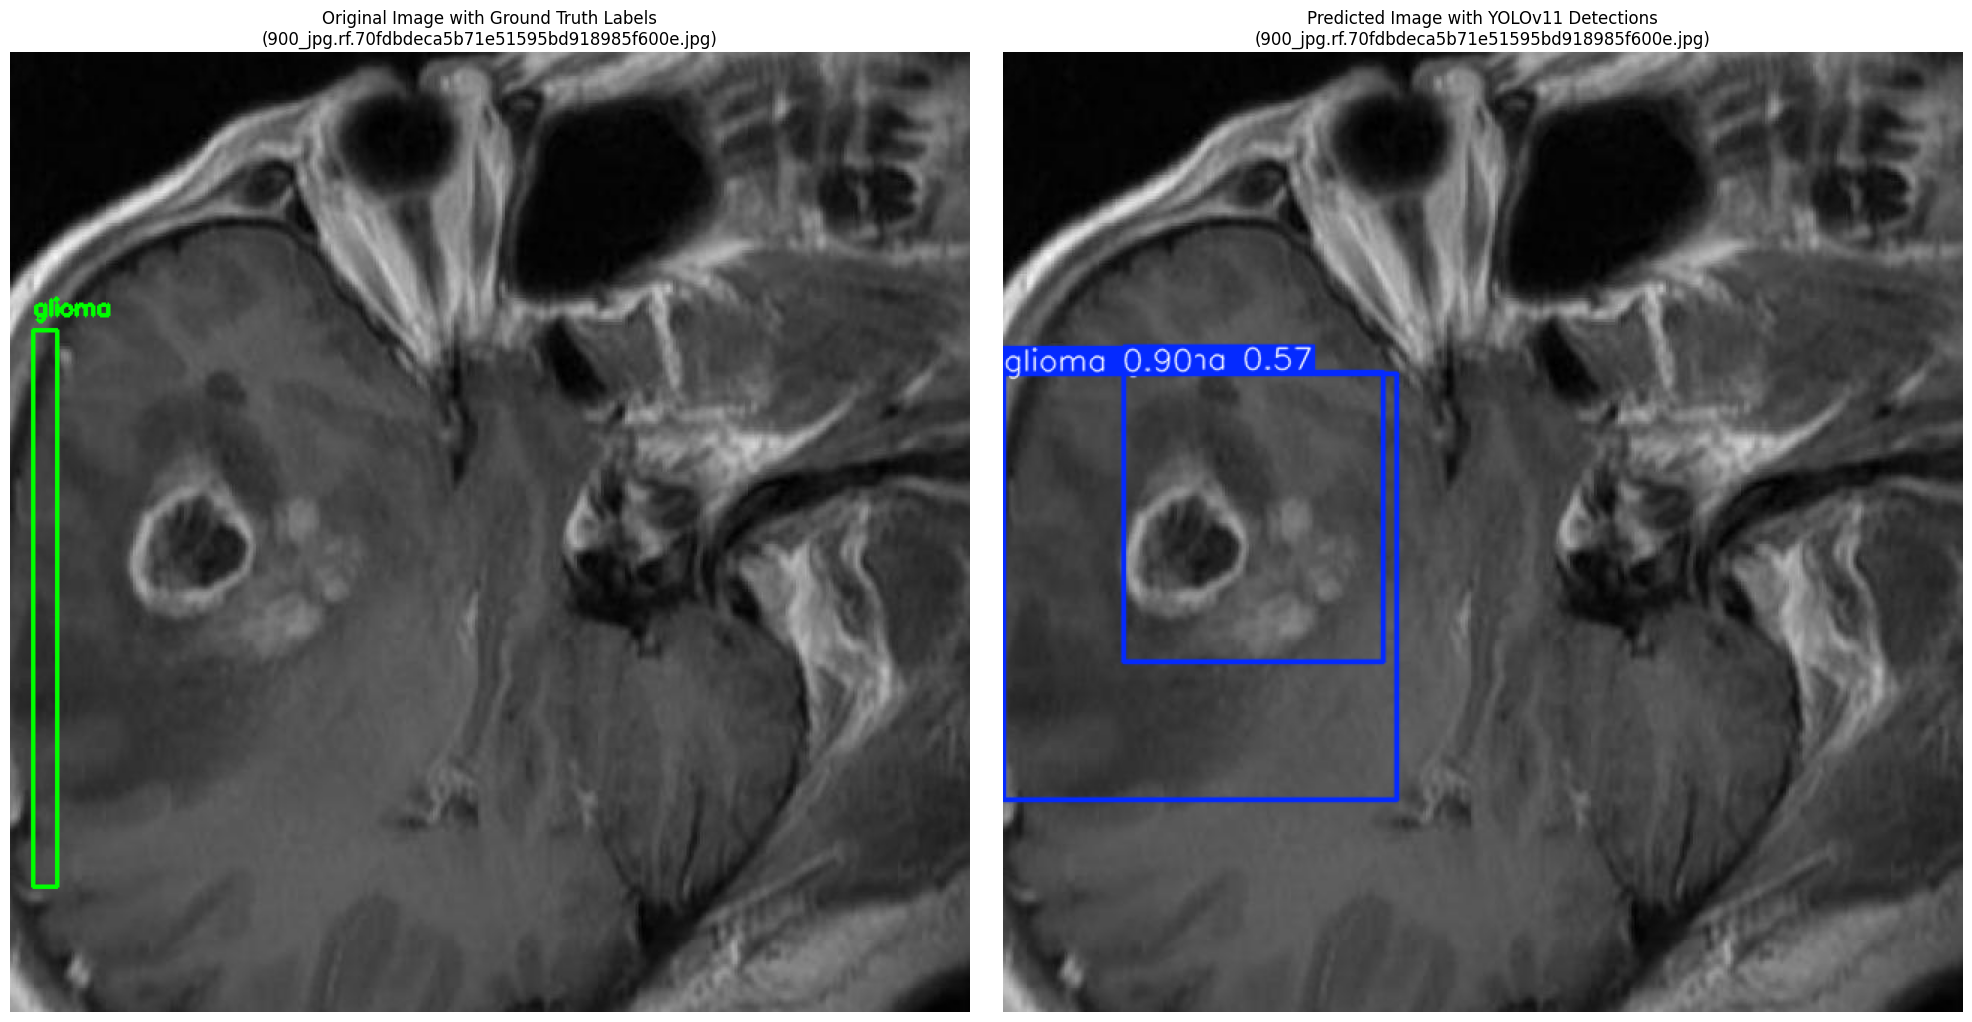


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/2812_jpg.rf.f4ebd1fa63f34d83a5d871791ff1b200.jpg: 640x640 2 gliomas, 11.8ms
Speed: 1.7ms preprocess, 11.8ms inference, 0.8ms postprocess per image at shape (1, 3, 640, 640)


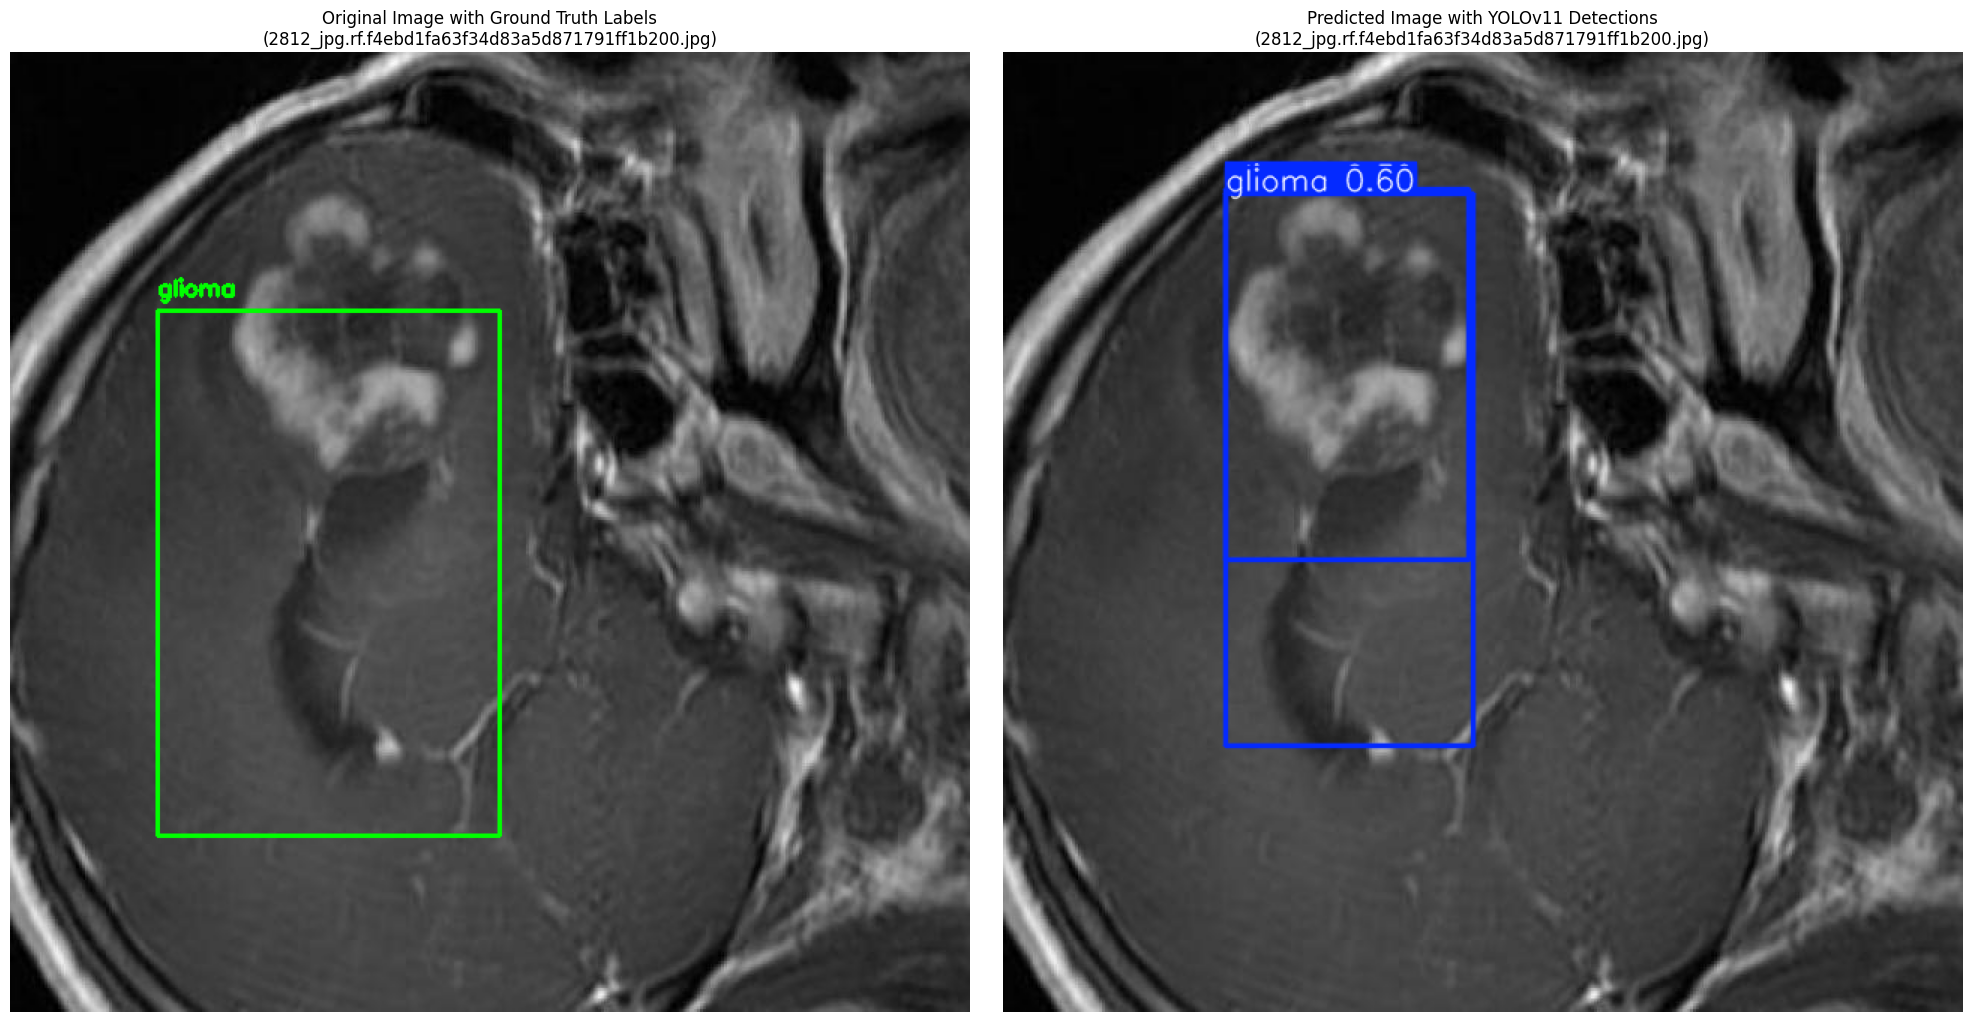


image 1/1 /mnt/Common/Code/Model Training/Afiya/Brain Tumor Detection/dataset/test/images/3045_jpg.rf.6a1e02d25dee2159b3ff4a58214dcf3c.jpg: 640x640 2 gliomas, 12.3ms
Speed: 1.0ms preprocess, 12.3ms inference, 0.7ms postprocess per image at shape (1, 3, 640, 640)


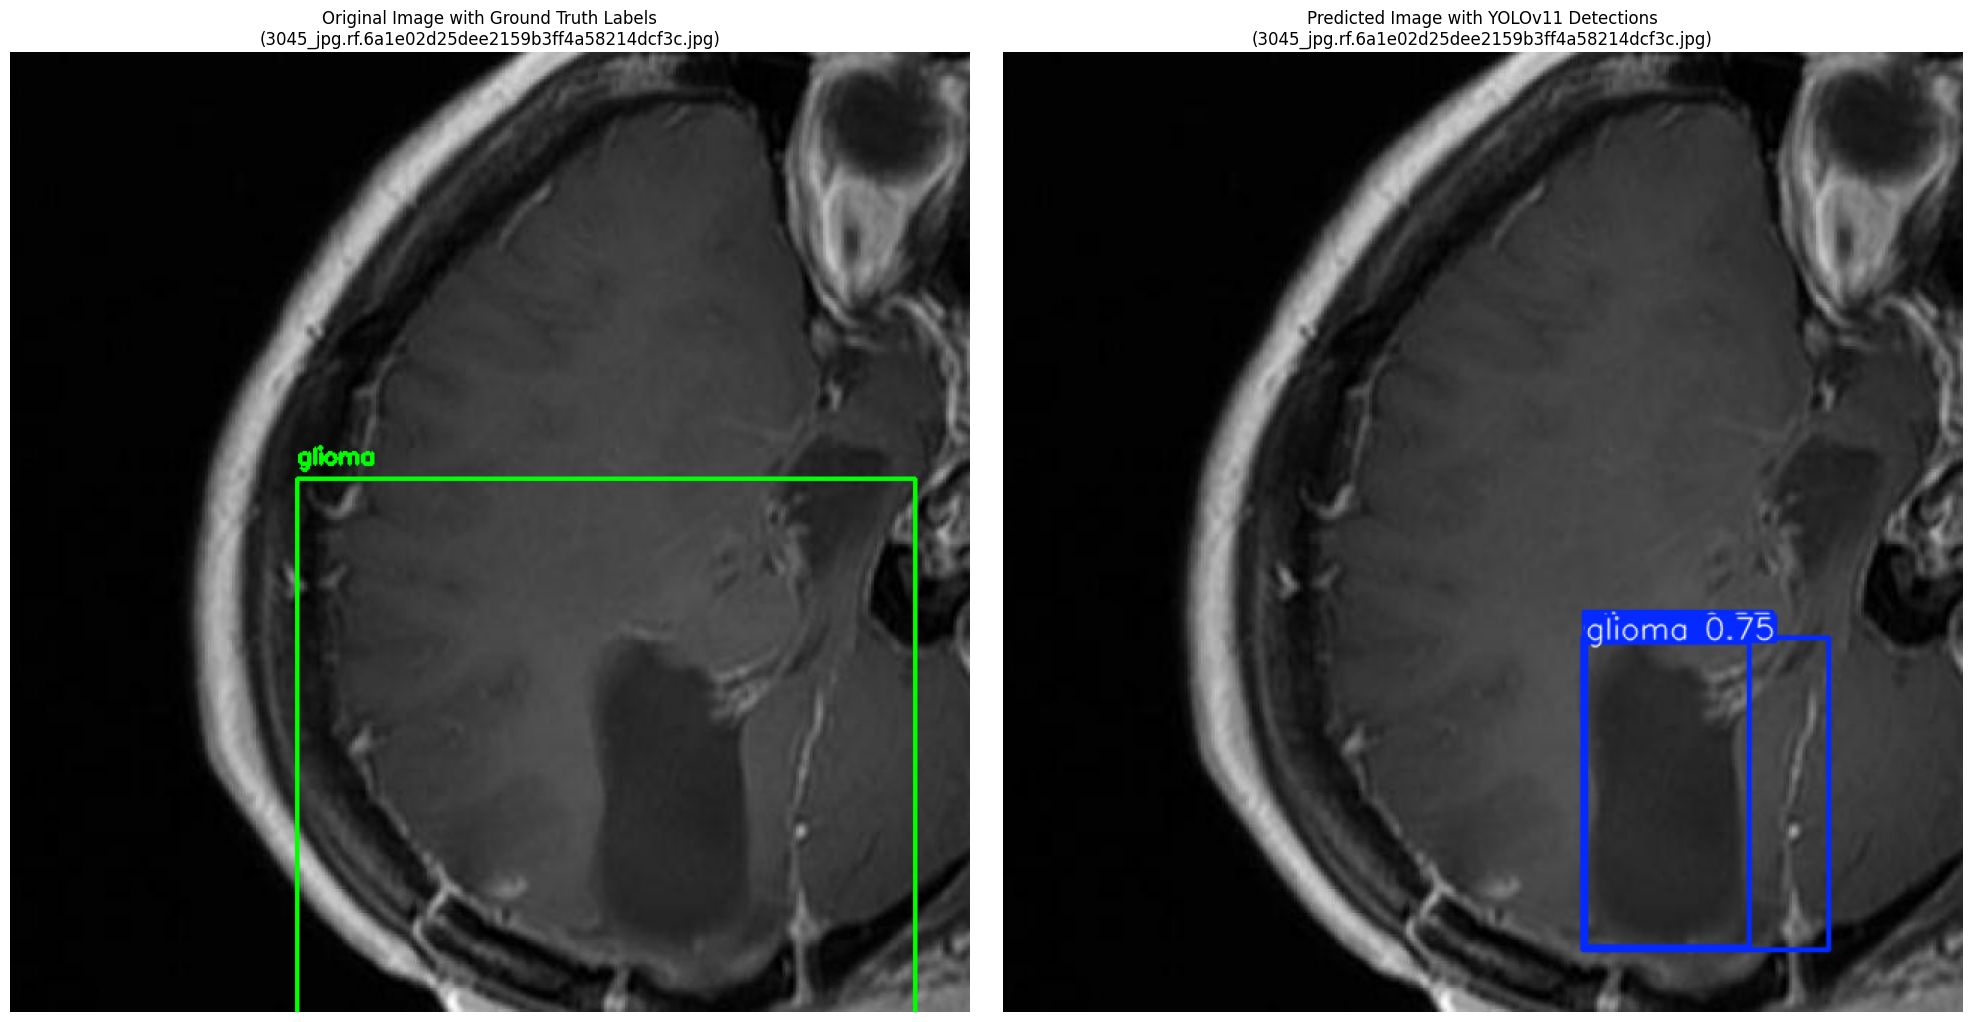

In [8]:
%matplotlib inline
for img_path in test_image_files:
    img_filename = os.path.basename(img_path)
    img_name_no_ext = os.path.splitext(img_filename)[0]
    label_path = os.path.join(TEST_LABELS_DIR, img_name_no_ext + '.txt')

    original_image = cv2.imread(img_path)
    original_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2RGB)

    ground_truth_annotations = []
    if os.path.exists(label_path):
        with open(label_path, 'r') as f:
            for line in f:
                parts = list(map(float, line.strip().split()))
                ground_truth_annotations.append(parts)

    ground_truth_image_display = draw_annotations(original_image.copy(), ground_truth_annotations, class_names, color=(0, 255, 0), is_gt=True)

    prediction_results = trained_model.predict(
        source=img_path,
        imgsz=IMG_SIZE,
        conf=CONF_THRESHOLD,
        # iou=IOU_THRESHOLD,
        # save=True,
        # save_txt=True,
        project=PREDICT_PROJECT_NAME,
        name=PREDICT_RUN_NAME,
        exist_ok=True
    )

    predicted_image_path_in_runs = os.path.join(PREDICT_PROJECT_NAME, PREDICT_RUN_NAME, img_filename)

    if os.path.exists(predicted_image_path_in_runs):
        predicted_image_display = cv2.imread(predicted_image_path_in_runs)
        predicted_image_display = cv2.cvtColor(predicted_image_display, cv2.COLOR_BGR2RGB)
    else:
        print(f"Warning: Predicted image not found at {predicted_image_path_in_runs}. Plotting from results.")
        if prediction_results:
            r = prediction_results[0]
            im_np = r.plot()
            predicted_image_display = cv2.cvtColor(im_np, cv2.COLOR_BGR2RGB)
        else:
            predicted_image_display = np.zeros_like(original_image)

    fig, axes = plt.subplots(1, 2, figsize=(20, 10))
    axes[0].imshow(ground_truth_image_display)
    axes[0].set_title(f'Original Image with Ground Truth Labels\n({img_filename})')
    axes[0].axis('off')

    axes[1].imshow(predicted_image_display)
    axes[1].set_title(f'Predicted Image with YOLOv11 Detections\n({img_filename})')
    axes[1].axis('off')

    plt.tight_layout()
    plt.show()